In [193]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Investing.com
#https://www.investing.com/currencies/usd-cnh-historical-data
#2018-01-01 to 2022-11-30
data = pd.read_csv("/content/drive/MyDrive/政大課程/111選擇權評價與應用/TRF/USD_CNH.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)
print(len(data))
data.tail(5)

1283


,Date,Price,Open,High,Low,Vol.,Change %
4,2022-11-24,7.1686,7.1537,7.1706,7.1331,149.19K,0.23%
3,2022-11-25,7.1957,7.1695,7.2120,7.1493,112.89K,0.38%
2,2022-11-28,7.2471,7.1955,7.2577,7.1955,135.36K,0.71%
1,2022-11-29,7.1429,7.2474,7.2496,7.1339,144.36K,-1.44%
0,2022-11-30,7.0449,7.1428,7.1606,7.0439,162.01K,-1.37%


In [194]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-12-03 18:23:57--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.148.113, 142.250.148.102, 142.250.148.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.148.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vn8slg9e7k23osgc77gdhb2uj6pj9og3/1670091825000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=df4755c0-573f-4674-a7d5-d405b24e2227 [following]
--2022-12-03 18:23:58--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vn8slg9e7k23osgc77gdhb2uj6pj9og3/1670091825000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=df4755c0-573f-4674-a7d5-d405b24e2227
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.126.132, 2607:f8b0:4001:c02::84
Connecting to do

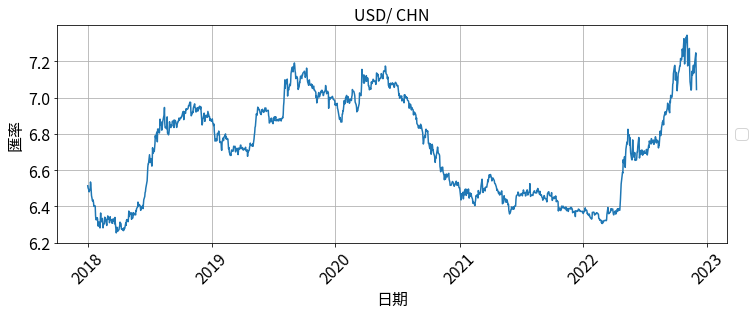

In [195]:
from datetime import datetime
plt.figure(figsize=(12,4))
plt.plot(data.Date, data.Price)

plt.title("USD/ CHN", fontsize=16)
plt.ylabel("匯率", fontsize=16)
plt.xlabel("日期", fontsize=16)
plt.grid(axis='both')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
# plt.axvline(x=datetime.strptime('2014/01/24', '%Y/%m/%d'))
plt.savefig('/content/drive/MyDrive/政大課程/111選擇權評價與應用/TRF/USD_CHN.png', bbox_inches='tight')
plt.show()

TRF評價公式

$$Amt\times[\max(K1-F_t,0)-\alpha\times\max(F_t-K1,0)]$$
where

$Amt$為持有名目本金

$F_t$為遠期外匯

$\alpha$為槓桿名目本金倍數

$K1$為履約價

$$dS_t=u(S_t,t)dt+\sigma(S_t,t)dW_t$$
$$F_t=S_te^{(r-r_f)(T-t)}$$
$$\ln\frac{F_t}{S_t}=(r-r_f)(T-t)$$
where \\

$S_t$為計算日即期匯率

$F_t$為遠期外匯

$r$為本國利率

$r_f$為外國利率

$W_t$為Wiener Process

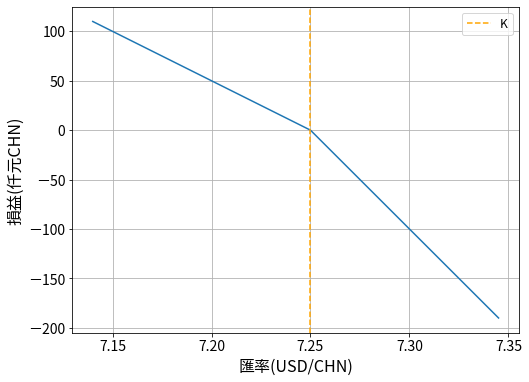

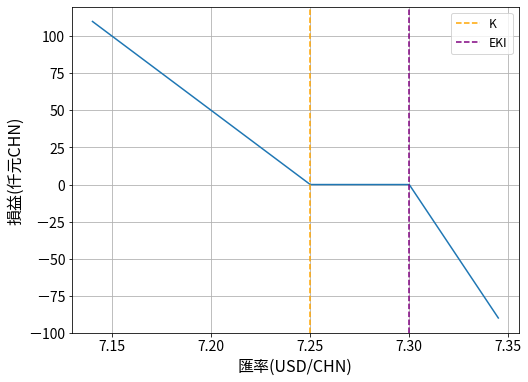

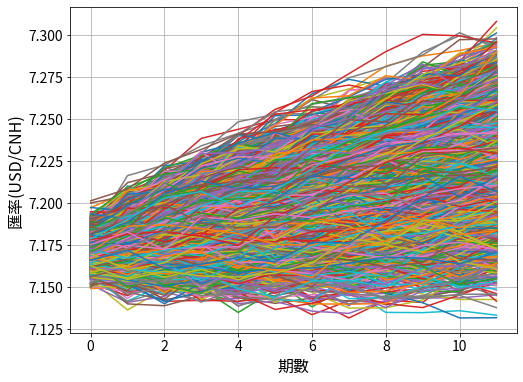

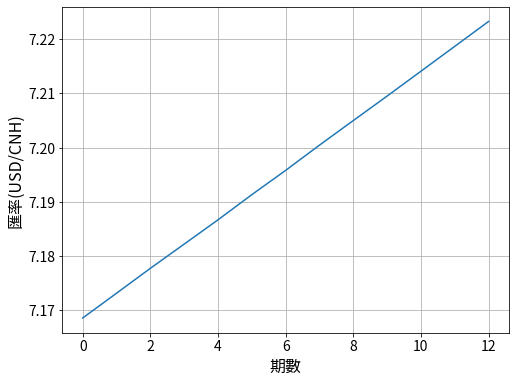

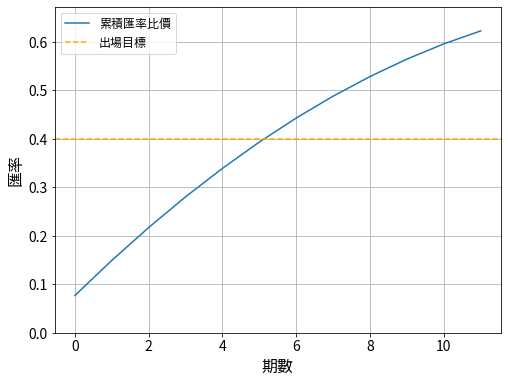

FINISH


In [196]:
def TRF_plot(TRF):
  
  #無保護區間
  if TRF == 'TRF':
    payoff = Amt * (np.maximum(K-F,0) - a*np.maximum(F-K,0))
    fig, ax = plt.subplots(figsize = (8, 6))
    ax.plot(F, np.array(payoff)/1000, alpha=1)
    ax.axvline(x=K, label='K', linestyle='--', color='orange')
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    plt.grid(axis='both')
    plt.xlabel('匯率(USD/CHN)', fontsize=16)
    plt.ylabel('損益(仟元CHN)', fontsize=16)
    plt.legend(fontsize=12)
    plt.savefig('/content/drive/MyDrive/政大課程/111選擇權評價與應用/TRF/TRF_no_show.png', bbox_inches='tight')
    plt.show()

  #有保護區間
  elif TRF == 'EKI':
    payoff = Amt * (np.maximum(K-F,0) - a*np.maximum(F-EKI,0))
    fig, ax = plt.subplots(figsize = (8, 6))
    ax.plot(F, np.array(payoff)/1000, alpha=1)
    ax.axvline(x=K, label='K', linestyle='--', color='orange')
    ax.axvline(x=EKI, label='EKI', linestyle='--', color='purple')
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    plt.grid(axis='both')
    plt.xlabel('匯率(USD/CHN)', fontsize=16)
    plt.ylabel('損益(仟元CHN)', fontsize=16)
    plt.legend(fontsize=12)
    plt.savefig('/content/drive/MyDrive/政大課程/111選擇權評價與應用/TRF/TRF_EKI_show.png', bbox_inches='tight')
    plt.show()

#外匯模擬路徑
def MCS(S, r, rf, sigma, T, steps, N):#即期匯率，遠期外匯、本國利率、外國利率
    dt = T/steps
    ST = np.log(S) + np.cumsum(((r - rf - 0.5*sigma**2)*dt + 
                                sigma * np.sqrt(dt) 
                                * np.random.normal(size=(steps, N))),axis=0)
    return np.exp(ST)

def MCS_plot():#蒙地卡羅模擬匯率走勢
  fig, ax = plt.subplots(figsize = (8, 6))
  add_paths = np.insert(paths, 0, S, axis=1)
  ax.plot(add_paths)
  ax.xaxis.set_tick_params(labelsize=14)
  ax.yaxis.set_tick_params(labelsize=14)
  plt.grid(axis='both')
  plt.xlabel('期數', fontsize=16)
  plt.ylabel('匯率(USD/CNH)', fontsize=16)
  plt.savefig('/content/drive/MyDrive/政大課程/111選擇權評價與應用/TRF/MCS.png', bbox_inches='tight')
  plt.show()

def S_plot():#平均匯率走勢
  fig, ax = plt.subplots(figsize = (8, 6))
  add_S = np.insert(S_ls, 0, S)
  plt.plot(add_S)#每期匯率
  ax.xaxis.set_tick_params(labelsize=14)
  ax.yaxis.set_tick_params(labelsize=14)
  plt.grid(axis='both')
  plt.xlabel('期數', fontsize=16)
  plt.ylabel('匯率(USD/CNH)', fontsize=16)
  plt.savefig('/content/drive/MyDrive/政大課程/111選擇權評價與應用/TRF/exchange.png', bbox_inches='tight')
  plt.show()

def TRF_price(TRF,t):

  if TRF == 'TRF':#無保護區間
    price = Amt * (np.maximum(K-S_ls[t],0) - a * np.maximum(S_ls[t]-K,0))#TRF評價公式

  elif TRF == 'EKI':#有保護區間
    price = Amt * (np.maximum(K-S_ls[t],0) - a * np.maximum(S_ls[t]-EKI,0))#TRF評價公式

  return price

def cum_plot():#累積匯率比價
  fig, ax = plt.subplots(figsize = (8, 6))
  ax.plot(df['cum'], label='累積匯率比價')
  ax.xaxis.set_tick_params(labelsize=14)
  ax.yaxis.set_tick_params(labelsize=14)
  plt.axhline(y=condition, linestyle='--', color='orange', label='出場目標')
  plt.ylim([0, max(df['cum'])+0.05])
  plt.grid()
  plt.ylabel('匯率', fontsize=16)
  plt.xlabel('期數', fontsize=16)
  plt.legend(fontsize=12)
  plt.savefig('/content/drive/MyDrive/政大課程/111選擇權評價與應用/TRF/cum.png', bbox_inches='tight')
  plt.show()




np.random.seed(111352021)#亂數設定

#即期外匯USD/CHN。2022/11/30。7.1686。
#美國十年公債殖利率。2022/11/30。3.68%。https://www.stockq.org/bond/treasury.php
#中國十年公債殖利率。2022/11/30。2.92%。https://www.macromicro.me/charts/1003/cn-10year-bond-yield-rate

Amt = 1000000#名目本金
S = 7.1686#即期外匯
K = 7.25
EKI = 7.3
F = np.arange(K-0.11, K+0.1, 0.005) #遠期外匯#x軸
r = 0.0368#本國利率#人民幣無風險利率
rf = 0.0292#外國利率#美元無風險利率
sigma = data['Price'].pct_change().std()#匯率標準差
a=2 #槓桿
condition = 0.4 #出場條件

#模擬文獻
# Amt = 500000#名目本金
# S = 6.0387
# K=6.085#履約價
# F = np.arange(K-0.15, K+0.15, 0.005) #遠期外匯
# a=2 #槓桿
# sigma = 0.01365
# r = 0.0175
# rf = 0.008
# EKI = 6.15 
# condition = 0.2 #出場條件


N = 10000 #模擬次數
T = 1
steps = 12

TRF_plot('TRF')#繪製損益圖#無保護區間
TRF_plot('EKI')#繪製損益圖#有保護區間

paths = MCS(S, r, rf, sigma, T, steps, N)#蒙地卡羅#每次都模擬未來12個月的匯率走勢
MCS_plot()
S_ls = paths.mean(axis=1)#每期取平均的匯率
S_plot()
cum = np.cumsum(K - S_ls)#累積匯率比價
TRF_payoff = []
EKI_payoff = []
for t in range(12):
  TRF_payoff.append(TRF_price('TRF',t))
  EKI_payoff.append(TRF_price('EKI',t))

df = pd.DataFrame({'term':range(1,13),
      'exchange':S_ls,
      'diff':K - S_ls,
      'cum':cum,
      'TRF_payoff':TRF_payoff,
      'EKI_payoff':EKI_payoff})
df['TRF_payoff_cum'] = df['TRF_payoff'].cumsum()
df['EKI_payoff_cum'] = df['EKI_payoff'].cumsum()
df.to_csv('/content/drive/MyDrive/政大課程/111選擇權評價與應用/TRF/payoff.csv', index=False)
cum_plot()
print('FINISH')

In [197]:
df

,term,exchange,diff,cum,TRF_payoff,EKI_payoff,TRF_payoff_cum,EKI_payoff_cum
0,1,7.173168,0.076832,0.076832,76831.936619,76831.936619,76831.936619,76831.936619
1,2,7.177758,0.072242,0.149073,72241.555054,72241.555054,149073.491673,149073.491673
2,3,7.182218,0.067782,0.216855,67781.663732,67781.663732,216855.155406,216855.155406
3,4,7.186693,0.063307,0.280162,63306.842346,63306.842346,280161.997751,280161.997751
4,5,7.191334,0.058666,0.338828,58665.987124,58665.987124,338827.984875,338827.984875
5,6,7.195806,0.054194,0.393022,54193.796721,54193.796721,393021.781596,393021.781596
6,7,7.200459,0.049541,0.442563,49541.131557,49541.131557,442562.913153,442562.913153
7,8,7.204994,0.045006,0.487569,45006.197737,45006.197737,487569.110890,487569.110890
8,9,7.209504,0.040496,0.528065,40495.870952,40495.870952,528064.981842,528064.981842
9,10,7.214083,0.035917,0.563982,35917.042906,35917.042906,563982.024749,563982.024749


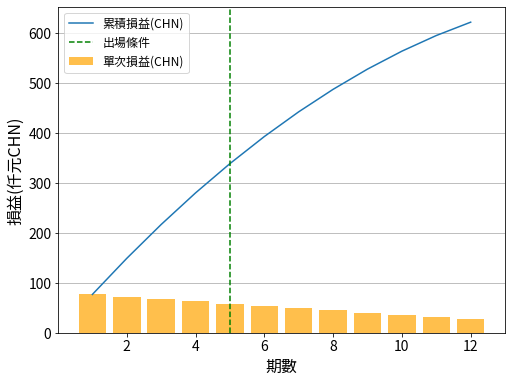

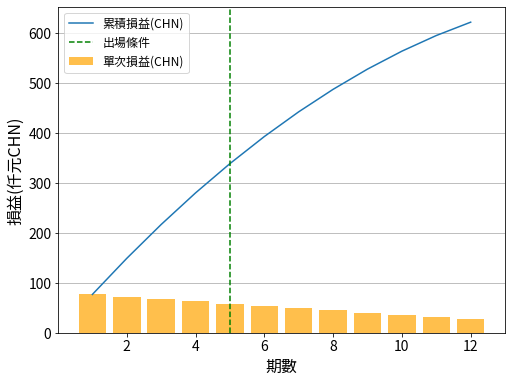

In [198]:
stop = np.argwhere(df['cum'].values<=condition)[-1][0]#出場期數點

#TRF#無保護區間
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(df['term'], df['TRF_payoff']/1000, color='orange', alpha=0.7, label='單次損益(CHN)')
ax.plot(df['term'], df['TRF_payoff_cum']/1000, label='累積損益(CHN)')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.axvline(x=stop, linestyle='--', color='green', label='出場條件')
plt.ylabel('損益(仟元CHN)', fontsize=16)
plt.xlabel('期數', fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y')
plt.savefig('/content/drive/MyDrive/政大課程/111選擇權評價與應用/TRF/TRF_cum.png', bbox_inches='tight')
plt.show()


#EKI#有保護區間
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(df['term'], df['EKI_payoff']/1000, color='orange', alpha=0.7, label='單次損益(CHN)')
ax.plot(df['term'], df['EKI_payoff_cum']/1000, label='累積損益(CHN)')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.axvline(x=stop, linestyle='--', color='green', label='出場條件')
plt.ylabel('損益(仟元CHN)', fontsize=16)
plt.xlabel('期數', fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y')
plt.savefig('/content/drive/MyDrive/政大課程/111選擇權評價與應用/TRF/EKI_cum.png', bbox_inches='tight')
plt.show()

In [199]:
condition

0.4